GROUP: 2

Member:
- Janice Mamani

In [2]:
install.packages("collapse")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("lubridate")
install.packages("glmnet")
install.packages("lmtest")
install.packages("sandwich")
install.packages("dagitty")
install.packages("lmtest")
install.packages("sandwich")
install.packages("ggplot2")
install.packages("hdm")
install.packages("xtable")
install.packages("backports")
install.packages("broom")
install.packages("arm")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’


In [4]:
library('collapse')
library("ggplot2")
library("tidyverse")
library("lubridate")
library("glmnet")
library("lmtest")
library("sandwich")
library("dagitty")
library(lmtest)
library(sandwich)
library(xtable)
library(arm)
library(hdm)

In [ ]:
install.packages("dplyr")

also installing the dependencies 'fansi', 'utf8', 'cli', 'glue', 'lifecycle', 'magrittr', 'pillar', 'rlang', 'tibble', 'tidyselect', 'vctrs'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'fansi' 'utf8' 'cli' 'glue' 'magrittr'
  'rlang' 'tibble' 'tidyselect' 'vctrs' 'dplyr'


  These will not be installed


installing the source packages 'lifecycle', 'pillar'

Warning message in install.packages("dplyr"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("dplyr"):
"installation of package 'pillar' had non-zero exit status"

In [ ]:
library(dplyr)

ERROR: Error in library(dplyr): there is no package called 'dplyr'


## Multicollinearity

**Multicollinearity** refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. This presents a problem because it undermines the statistical significance of an independent variable. Other consequences include highly variable least-squares estimates, which can be unstable and difficult to interpret. Moreover, this issue is typically divided into two categories:

- *Perfect Multicollinearity*: This arises when the matrix (X'X) is not invertible due to a lack of full rank. It occurs when at least one regressor is a linear combination of others, rendering the matrix singular and thus non-invertible.

- *Imperfect Multicollinearity*: This situation emerges when there is a strong, yet not perfectly linear, correlation between regressors. While Ordinary Least Squares (OLS) estimation is still feasible, the variance of the estimated coefficients increases with the degree of correlation. This increase in variance leads to lower t-statistics, increasing the likelihood of failing to reject the null hypothesis H0, even when the variable might be significant.

### Examples and Implications

1. *Example in Housing Prices*: Consider predicting housing prices based on features like the number of rooms, the size of the house (in square feet), and the number of bedrooms. Often, the number of rooms and the number of bedrooms are correlated because a larger number of rooms generally includes more bedrooms. This correlation can dilute the effect each variable has on the model because it is hard to distinguish their individual contributions to house prices.

2. *Example in Employee Data*: Predicting an employee's salary based on their years of education and years of experience. Typically, higher education might correlate with more years of experience, especially in certain fields. This can lead to multicollinearity issues when both are used as predictors for salary.

### Mathematical Representation

Let's denote the independent variables as $ X_1, X_2, \ldots, X_p $. The regression model can be expressed as:

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_p X_p + \epsilon
$$

where $ \epsilon $ is the error term. Multicollinearity arises when:

$$
X_j = \alpha_0 + \alpha_1 X_1 + \ldots + \alpha_{j-1} X_{j-1} + \alpha_{j+1} X_{j+1} + \ldots + \alpha_p X_p + \nu
$$

for some variable $ X_j $ being linearly predicted by other independent variables in the model, where $ \nu $ is a small error term.

### Consequences

- *Estimate Variance*: The variance of the estimated coefficients becomes large. This leads to wide confidence intervals and a less precise estimate of the effect size.
- *Coefficient Significance*: Statistical tests for the significance of coefficients might fail to detect true significant relationships due to increased standard errors.

In [5]:
# Set a seed for reproducibility
set.seed(0)

# Generate a 10x9 matrix with normally distributed values
# rnorm generates 90 (10*9) normally distributed values
# matrix function reshapes these into a 10x9 matrix
A <- matrix(rnorm(90, mean = 0, sd = 1), nrow = 10, ncol = 9)

# Print the matrix
print(A)


              [,1]       [,2]        [,3]       [,4]       [,5]        [,6]
 [1,]  1.262954285  0.7635935 -0.22426789 -0.2357066  1.7579031  0.26613736
 [2,] -0.326233361 -0.7990092  0.37739565 -0.5428883  0.5607461 -0.37670272
 [3,]  1.329799263 -1.1476570  0.13333636 -0.4333103 -0.4527840  2.44136463
 [4,]  1.272429321 -0.2894616  0.80418951 -0.6494716 -0.8320433 -0.79533912
 [5,]  0.414641434 -0.2992151 -0.05710677  0.7267507 -1.1665705 -0.05487747
 [6,] -1.539950042 -0.4115108  0.50360797  1.1519118 -1.0655906  0.25014132
 [7,] -0.928567035  0.2522234  1.08576936  0.9921604 -1.5637821  0.61824329
 [8,] -0.294720447 -0.8919211 -0.69095384 -0.4295131  1.1565370 -0.17262350
 [9,] -0.005767173  0.4356833 -1.28459935  1.2383041  0.8320471 -2.22390027
[10,]  2.404653389 -1.2375384  0.04672617 -0.2793463 -0.2273287 -1.26361438
             [,7]        [,8]       [,9]
 [1,]  0.35872890  0.01915639 -0.7970895
 [2,] -0.01104548  0.25733838  1.2540831
 [3,] -0.94064916 -0.64901008  0.7721422


In [6]:
# Assuming 'A' is already created as shown in previous steps
# Remember that R uses 1-based indexing (not 0-based like Python)

# Create the 10th vector as a linear combination of three vectors
linear_combination <- A[,1] + 2 * A[,3] + 3 * A[,5]

# Combine into a full matrix
full_matrix <- cbind(A, linear_combination)

# Round the full matrix to 3 decimal places
rounded_matrix <- round(full_matrix, 3)

# Calculate the determinant of the full matrix
det <- det(full_matrix)

# Round the determinant
round_det <- round(det)

# Print rounded matrix
print("Rounded Matrix:")
print(rounded_matrix)

# Print the determinant and rounded determinant
print(paste("Determinant:", det))
print(paste("Rounded Determinant:", round_det)) # The determinant is a very small number, almost zero.


[1] "Rounded Matrix:"
                                                                    
 [1,]  1.263  0.764 -0.224 -0.236  1.758  0.266  0.359  0.019 -0.797
 [2,] -0.326 -0.799  0.377 -0.543  0.561 -0.377 -0.011  0.257  1.254
 [3,]  1.330 -1.148  0.133 -0.433 -0.453  2.441 -0.941 -0.649  0.772
 [4,]  1.272 -0.289  0.804 -0.649 -0.832 -0.795 -0.116 -0.119 -0.220
 [5,]  0.415 -0.299 -0.057  0.727 -1.167 -0.055 -0.815  0.664 -0.425
 [6,] -1.540 -0.412  0.504  1.152 -1.066  0.250  0.242  1.101 -0.419
 [7,] -0.929  0.252  1.086  0.992 -1.564  0.618 -1.425  0.144  0.997
 [8,] -0.295 -0.892 -0.691 -0.430  1.157 -0.173  0.366 -0.118 -0.276
 [9,] -0.006  0.436 -1.285  1.238  0.832 -2.224  0.248 -0.912  1.256
[10,]  2.405 -1.238  0.047 -0.279 -0.227 -1.264  0.065 -1.438  0.647
      linear_combination
 [1,]              6.088
 [2,]              2.111
 [3,]              0.238
 [4,]              0.385
 [5,]             -3.199
 [6,]             -3.730
 [7,]             -3.448
 [8,]              

In [7]:
# Assuming 'full_matrix' has already been defined as shown in previous steps

# Try to find the inverse
tryCatch({
    inv_matrix <- solve(full_matrix)
    print("Inverse:")
    print(inv_matrix)
}, error = function(e) {
    print(paste("Error:", e$message))
})


[1] "Error: system is computationally singular: reciprocal condition number = 4.15794e-18"


As we can observe, attempting to invert the matrix in R results in an error. This occurs due to multicollinearity, as explained in the Python notebook

## 2. Analyzing RCT data with Precision Adjustment

In [10]:
## loading the data
Penn <- as.data.frame(read.table('/content/penn_jae.dat', header=T ))
Penn

abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,⋯,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
10824,0,18,18,0,0,0,0,2,0,⋯,1,0,0,0,0,0,0,0,1,0
10635,2,7,3,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
10551,5,18,6,1,0,0,0,0,0,⋯,0,0,1,0,1,0,0,0,0,0
10824,0,1,1,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
10747,0,27,27,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
10544,6,7,7,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
10845,1,1,1,0,0,0,0,0,0,⋯,1,0,0,1,0,0,0,1,0,0
10670,3,3,3,1,0,0,0,2,0,⋯,0,0,0,1,0,0,0,0,0,1
10768,3,28,11,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


In [11]:
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg==2 | tg==0)
attach(Penn)

In [12]:
T2 <- (tg==2)
summary(T2)


   Mode   FALSE    TRUE 
logical    3354    2428 

In [13]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,⋯,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,10824,0,18,18,0,0,0,0,2,0,⋯,1,0,0,0,0,0,0,0,1,0
2,10635,2,7,3,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,1,0,0
4,10824,0,1,1,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
10,10754,2,20,20,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,⋯,1,0,0,0,1,1,0,1,0,0


In [14]:
#summarize variables
summary(Penn)

      abdt             tg            inuidur1        inuidur2    
 Min.   :10404   Min.   :0.0000   Min.   : 1.00   Min.   : 0.00  
 1st Qu.:10600   1st Qu.:0.0000   1st Qu.: 3.00   1st Qu.: 2.00  
 Median :10698   Median :0.0000   Median :11.00   Median :10.00  
 Mean   :10696   Mean   :0.8398   Mean   :13.03   Mean   :12.25  
 3rd Qu.:10796   3rd Qu.:2.0000   3rd Qu.:25.00   3rd Qu.:23.00  
 Max.   :10880   Max.   :2.0000   Max.   :52.00   Max.   :52.00  
     female           black           hispanic          othrace        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.0000   Median :0.0000   Median :0.00000   Median :0.000000  
 Mean   :0.4007   Mean   :0.1188   Mean   :0.03632   Mean   :0.005189  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1.000000  
      dep               q1        

## Histogram

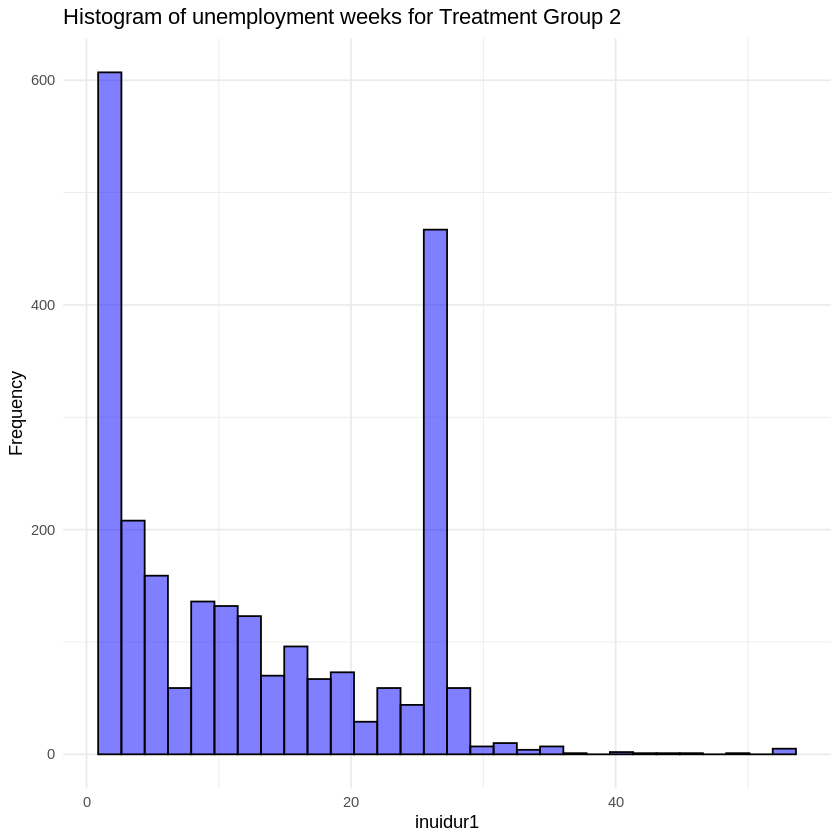

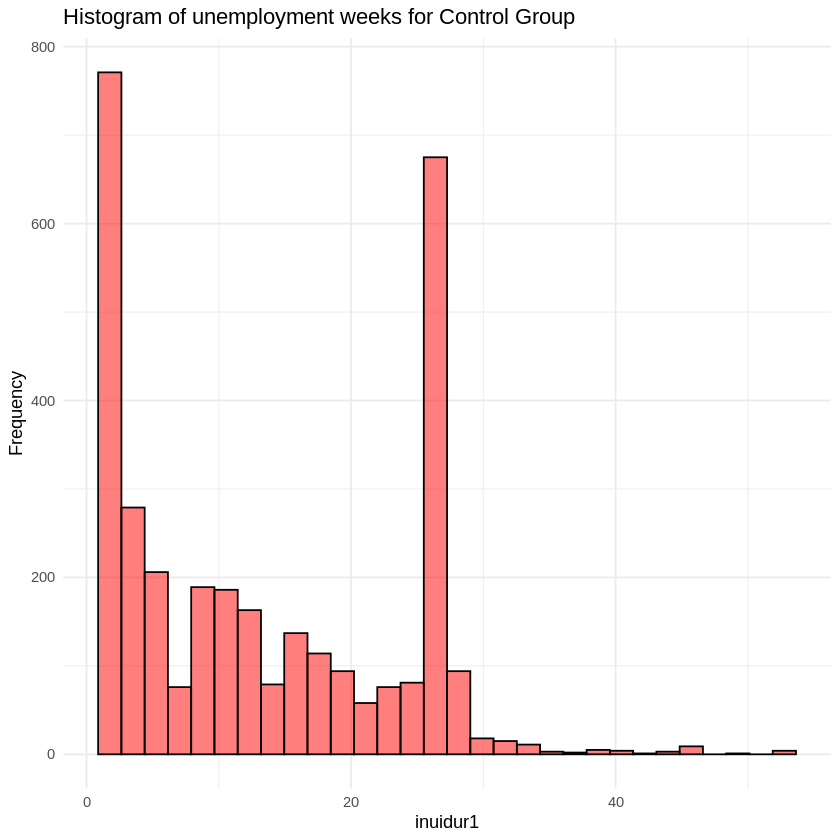

In [18]:
# Load the necessary libraries
library(ggplot2)
library(dplyr)

# Assuming Penn is your data frame and it's already loaded into your R environment

# Create a new ggplot object with the desired size
p <- ggplot(data = Penn, aes(x = inuidur1)) +
  theme_minimal()

# Plot the first histogram for the treatment group
p1 <- p +
  geom_histogram(data = Penn %>% filter(T2 == 1), fill = "blue", alpha = 0.5, bins = 30, color = "black", show.legend = TRUE) +
  labs(title = "Histogram of unemployment weeks for Treatment Group 2", x = "inuidur1", y = "Frequency") +
  theme(legend.position = "right")

# Plot the second histogram for the control group
p2 <- p +
  geom_histogram(data = Penn %>% filter(T2 == 0), fill = "red", alpha = 0.5, bins = 30, color = "black", show.legend = TRUE) +
  labs(title = "Histogram of unemployment weeks for Control Group", x = "inuidur1", y = "Frequency") +
  theme(legend.position = "right")

# Display the plots
p1
p2

### Model
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

## Carry out covariate balance check

This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [ ]:
m <- lm(T2~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)

coeftest(m, vcov = vcovHC(m, type="HC1"))


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           0.5171342  0.1568823  3.2963 0.0009856 ***
female                0.0056240  0.1324597  0.0425 0.9661352    
black                -0.0307771  0.0847262 -0.3633 0.7164293    
othrace              -0.4278818  0.3005502 -1.4237 0.1545993    
factor(dep)1          0.1576567  0.1851798  0.8514 0.3945992    
factor(dep)2         -0.1927958  0.1508926 -1.2777 0.2014067    
q2                   -0.1092161  0.1583768 -0.6896 0.4904762    
q3                   -0.1075663  0.1579864 -0.6809 0.4959890    
q4                   -0.0621302  0.1581168 -0.3929 0.6943797    
q5                   -0.0498684  0.1575034 -0.3166 0.7515450    
q6                   -0.2176336  0.1558290 -1.3966 0.1625831    
agelt35              -0.0643464  0.1326376 -0.4851 0.6276032    
agegt54               0.0259251  0.2395371  0.1082 0.9138171    
durable              -0.1256397  0.1763853 -0.7123 0.4763064    

In [ ]:
# get same dataframe

X <- as.data.frame( model.matrix(m) )

no_col <- attributes(m$coefficients)$names[is.na(m$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]

#save( X1, file = "/m_reg_g2.RData")

## Histogram


# 2.1 Model Specification

### **Classical 2-sample approach, no adjustment (CL) & classical linear regression adjustment (CRA)**

In [ ]:
# no adjustment (2-sample approach)
formula_cl <- log(inuidur1)~T2
ols.cl_reg <- lm(formula_cl)
ols.cl = coeftest(ols.cl_reg, vcov = vcovHC(ols.cl_reg, type="HC1"))
print(ols.cl)





t test of coefficients:

             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.056830   0.020954 98.1580  < 2e-16 ***
T2TRUE      -0.078825   0.032509 -2.4247  0.01535 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [ ]:
# adding controls

formula_cra <- log(inuidur1)~T2+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2
ols.cra_reg <- lm(formula_cra)
ols.cra = coeftest(ols.cra_reg, vcov = vcovHC(ols.cra_reg, type="HC1"))
print(ols.cra)


t test of coefficients:

                       Estimate Std. Error t value  Pr(>|t|)    
(Intercept)           2.4471832  0.3580899  6.8340 9.123e-12 ***
T2TRUE               -0.0712066  0.0320440 -2.2222 0.0263124 *  
female               -0.9428048  0.2827961 -3.3339 0.0008620 ***
black                -0.6654258  0.2430567 -2.7377 0.0062056 ** 
othrace              -1.5494550  0.7312071 -2.1190 0.0341306 *  
factor(dep)1          0.2798498  0.3783316  0.7397 0.4595160    
factor(dep)2          0.1678164  0.3678718  0.4562 0.6482768    
q2                    0.0271228  0.3606226  0.0752 0.9400495    
q3                   -0.3542370  0.3601780 -0.9835 0.3254005    
q4                   -0.3380244  0.3606994 -0.9371 0.3487284    
q5                   -0.1777168  0.3598757 -0.4938 0.6214465    
q6                   -0.4456044  0.3612792 -1.2334 0.2174749    
agelt35              -0.3264815  0.3108711 -1.0502 0.2936639    
agegt54              -0.1551504  0.4796700 -0.3235 0.7463646    

## 1.3 Interactive regression model

In [ ]:
# get same dataframe for ols.cl


X <- as.data.frame( model.matrix(ols.cl_reg) )

no_col <- attributes(ols.cl_reg$coefficients)names[is.na(ols.cl_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]


save( X1, file = "../../data/ols_cl_reg_3.RData")



# get same dataframe for ols.cra

X <- as.data.frame( model.matrix(ols.cra_reg) )

no_col <- attributes(ols.cra_reg$coefficients)names[is.na(ols.cra_reg$coefficients)]

X1  <- X[, -which(names( X ) %in% no_col ) ]


save( X1, file = "../../data/ols_cra_reg_3.RData")



ERROR: Error in parse(text = x, srcfile = src): <text>:7:46: unexpected symbol
6: 
7: no_col <- attributes(ols.cl_reg$coefficients)names
                                                ^


In [ ]:
# interactive regression model variables

X <- model.matrix(~(female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)^2)[,-1] #without intercept

dim (X)


[1] 5782  119

In [ ]:
#interactive regression model

demean<- function(x){ x - mean(x)}
X = apply(X, 2, demean)

ols.ira_reg = lm(log(inuidur1) ~ T2*X)
ols.ira= coeftest(ols.ira_reg, vcov = vcovHC(ols.ira_reg, type="HC1"))
print(ols.ira)


t test of coefficients:

                               Estimate Std. Error t value  Pr(>|t|)    
(Intercept)                   2.0556976  0.0207138 99.2430 < 2.2e-16 ***
T2TRUE                       -0.0699044  0.0320764 -2.1793 0.0293503 *  
Xfemale                      -0.6662823  0.4080234 -1.6330 0.1025357    
Xblack                       -0.8634862  0.2969435 -2.9079 0.0036528 ** 
Xothrace                     -3.8176881  0.9366193 -4.0760 4.645e-05 ***
Xfactor(dep)1                 0.0359264  0.6476816  0.0555 0.9557666    
Xfactor(dep)2                 0.2117556  0.4512231  0.4693 0.6388790    
Xq2                          -0.2546436  0.4553391 -0.5592 0.5760207    
Xq3                          -0.6212326  0.4549639 -1.3655 0.1721653    
Xq4                          -0.4799269  0.4561206 -1.0522 0.2927566    
Xq5                          -0.3718675  0.4538882 -0.8193 0.4126542    
Xq6                          -0.6770474  0.4521499 -1.4974 0.1343469    
Xagelt35                 

In [ ]:
head(X)

In [ ]:
# get same dataframe for ols.ira
S <- as.data.frame( model.matrix(ols.ira_reg) )

no_col <- attributes(ols.ira_reg$coefficients)$names[is.na(ols.ira_reg$coefficients)]

S1  <- S[, -which(names( S ) %in% no_col ) ]

names(S1)[2] <- "T2"
#save( S1, file = "../../../data/ols_ira_reg.RData")

### Interactive regression adjustment using Lasso

In [ ]:
T2 = demean(T2)
DX = model.matrix(~T2*X)[,-1]
head(DX)

,T2,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,⋯,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
1,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,0.839329,-0.2001038,-0.2355586,-0.2232791,0.7367693,⋯,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
2,0.5800761,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,0.7644414,-0.2232791,-0.2632307,⋯,0,-0.04263790,0.50322755,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
3,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,⋯,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
4,-0.4199239,-0.4007264,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,⋯,0,0.03086608,0.05563156,0.05120138,0.007916241,0.0136537,0.01162017,0.02309509,0.01220118,0
5,0.5800761,0.5992736,-0.118817,-0.005188516,-0.1165687,-0.160671,-0.2001038,-0.2355586,0.7767209,-0.2632307,⋯,0,-0.04263790,-0.07684855,-0.07072875,-0.010935367,-0.0188610,-0.01605192,-0.03190318,-0.01685451,0
6,-0.4199239,-0.4007264,-0.118817,-0.005188516,0.8834313,-0.160671,-0.2001038,-0.2355586,-0.2232791,0.7367693,⋯,0,0.03086608,0.05563156,0.05120138,-0.412007661,-0.4062702,0.01162017,-0.39682881,0.01220118,0


In [ ]:
rlasso.ira = summary(rlassoEffects(DX, log(inuidur1), index = 1))

# rlassoEffects ( Partialling out )
# index = 1 (T2 treatment )
print(rlasso.ira)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’, ‘glmnet’, ‘checkmate’, ‘Formula’




[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)  
T2  -0.07457    0.03209  -2.324   0.0201 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




In [ ]:
# getting data
S = as.data.frame(DX)
#save( S, file = "../../../data/rlasso_ira_reg.RData")

In [ ]:
head(S)

# Results

In [ ]:
table<- matrix(0, 2, 4)
table[1,1]<-  ols.cl[2,1]
table[1,2]<-  ols.cra[2,1]
table[1,3]<-  ols.ira[2,1]
table[1,4]<-  rlasso.ira[[1]][1]

table[2,1]<-  ols.cl[2,2]
table[2,2]<-  ols.cra[2,2]
table[2,3]<-  ols.ira[2,2]
table[2,4]<-  rlasso.ira[[1]][2]


colnames(table)<- c("CL","CRA","IRA", "IRA w Lasso")
rownames(table)<- c("estimate", "standard error")
tab<- xtable(table, digits=5)
tab

print(tab, type="latex", digits=5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,CL,CRA,IRA,IRA w Lasso
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,-0.07882533,-0.07120664,-0.06990440,-0.07457328
standard error,0.03250889,0.03204403,0.03207638,0.03208892


% latex table generated in R 4.3.3 by xtable 1.8-4 package
% Tue Apr 23 20:03:41 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & CL & CRA & IRA & IRA w Lasso \\ 
  \hline
estimate & -0.07883 & -0.07121 & -0.06990 & -0.07457 \\ 
  standard error & 0.03251 & 0.03204 & 0.03208 & 0.03209 \\ 
   \hline
\end{tabular}
\end{table}


### Conclussion

In [ ]:
#save the coefficients
require(broom)
coef_ira <- tidy(ols.ira)

Loading required package: broom



In [ ]:
#extract the ones we are interested: T2TRUE:Xfemale, T2TRUE:Xblack, T2TRUE:Xagelt35, T2TRUE:Xfactor(dep)1

tablo<- matrix(0, 2, 4)

tablo[1,1]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 2])
tablo[1,2]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 2])
tablo[1,3]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),2])
tablo[1,4]<-  as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfactor(dep)1"),2])

tablo[2,1]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 3])
tablo[2,2]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 3])
tablo[2,3]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),3])
tablo[2,4]<- as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfactor(dep)1"),3])

colnames(tablo)<- c( "T2female", "T2black","T2agelt35", "T2factor(dep)1")
rownames(tablo)<- c("estimate", "standard error")
tabo<- xtable(tablo, digits=4)
tabo

print(tabo, type="latex", digits=4)

#summarize the values in a table


,T2female,T2black,T2agelt35,T2factor(dep)1
,<dbl>,<dbl>,<dbl>,<dbl>
estimate,-0.6597505,0.4525570,1.1233199,0.7636025
standard error,0.5498974,0.5103188,0.6374193,0.7854484


% latex table generated in R 4.3.3 by xtable 1.8-4 package
% Tue Apr 23 20:05:45 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrrrr}
  \hline
 & T2female & T2black & T2agelt35 & T2factor(dep)1 \\ 
  \hline
estimate & -0.6598 & 0.4526 & 1.1233 & 0.7636 \\ 
  standard error & 0.5499 & 0.5103 & 0.6374 & 0.7854 \\ 
   \hline
\end{tabular}
\end{table}


In [ ]:
coef.vect.o <- c(as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 2]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 2]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),2]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfactor(dep)1"),2]))
coef.vect.o

sd.vect.o <- c(as.double(coef_ira[(coef_ira$term=="T2TRUE:Xfemale"), 3]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xblack"), 3]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),3]), as.double(coef_ira[(coef_ira$term=="T2TRUE:Xagelt35"),3]))
sd.vect.o

[1] -0.6597505  0.4525570  1.1233199  0.7636025

[1] 0.5498974 0.5103188 0.6374193 0.6374193

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘lme4’, ‘abind’, ‘coda’


Loading required package: MASS

Loading required package: Matrix

Loading required package: lme4


arm (Version 1.14-4, built: 2024-4-1)


Working directory is /content



Attaching package: ‘arm’


The following object is masked from ‘package:xtable’:

    display




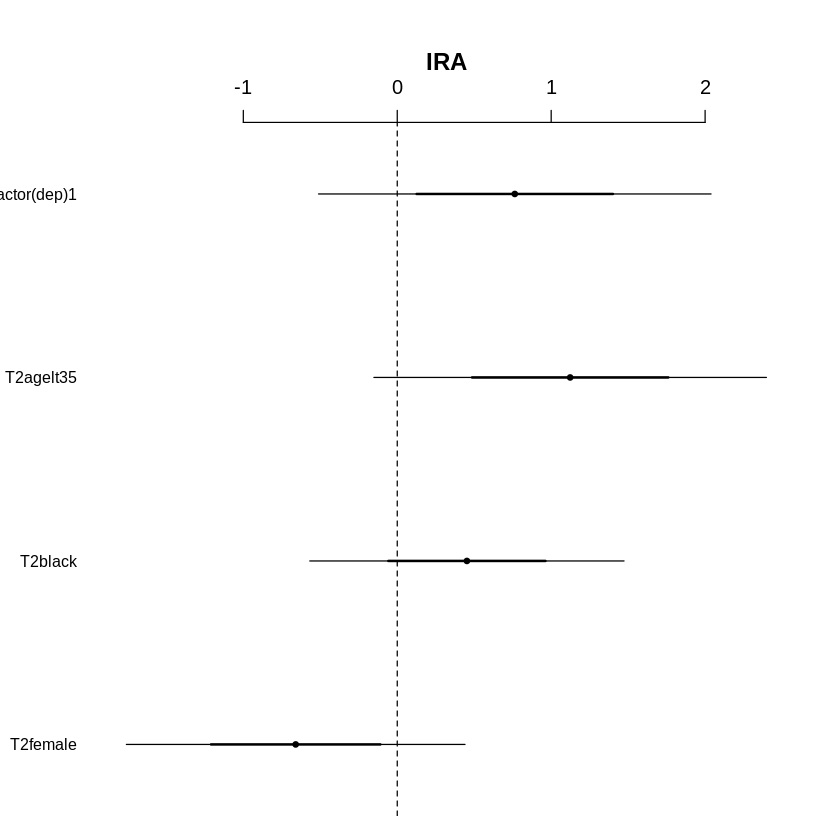

In [ ]:
ongnames <- c("T2female", "T2black","T2agelt35", "T2factor(dep)1")
coefplot(coef.vect.o, sd.vect.o, varnames=longnames, main="IRA")


According to the graph, none of the four heterogeneous effects are statistically significant at the 5% level, and the interval estimate includes zero. However, the interaction term T2*agelt35 is statistically significant at the 10% level.

This leads us to conclude that there's insufficient evidence to suggest a specific effect for female individuals, Black individuals, those under 35 years old, or those with one dependent among the treated group.

 #  3. A Crash Course in Good and Bad Controls

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’




In [ ]:
# Set seed for reproducibility
set.seed(1234567)

# Define sample size
n <- 1000

### Model 1 - Good Control: Common cause between X and Y

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



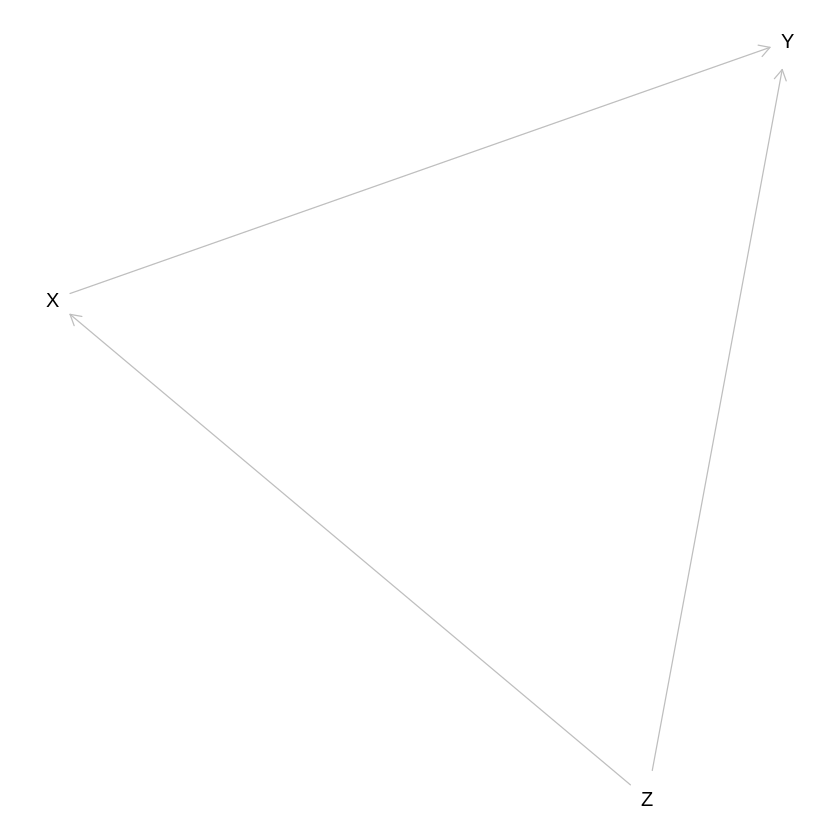

In [ ]:
# Creathe DAG for model 1
dag <- dagitty("dag {
  Z -> Y
  Z -> X
  X -> Y
}")

# Visualizar el DAG
plot(dag)


In [ ]:
# Model 1: Generate variables
Z1 <- rnorm(n)
X1 <- 4 * Z1 + rnorm(n)
Y1 <- X1 + 0.8 * Z1 + rnorm(n)

# Create data frame for Model 1
data1 <- data.frame(Z = Z1, X = X1, Y = Y1)

# Perform regression without Z
model1_without_Z <- lm(Y ~ X, data = data1)
print("Model 1 without Z:")
print(summary(model1_without_Z))

# Perform regression with Z
model1_with_Z <- lm(Y ~ X + Z, data = data1)
print("Model 1 with Z:")
print(summary(model1_with_Z))

[1] "Model 1 without Z:"

Call:
lm(formula = Y ~ X, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4807 -0.7003 -0.0006  0.7006  3.7476 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.002659   0.008741   0.304    0.761    
X           1.188448   0.002125 559.393   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.031 on 13911 degrees of freedom
Multiple R-squared:  0.9574,	Adjusted R-squared:  0.9574 
F-statistic: 3.129e+05 on 1 and 13911 DF,  p-value: < 2.2e-16

[1] "Model 1 with Z:"

Call:
lm(formula = Y ~ X + Z, data = data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4712 -0.6900  0.0001  0.6901  3.6547 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.001685   0.008584   0.196    0.844    
X           1.000201   0.008544 117.063   <2e-16 ***
Z           0.800539   0.035235  22.720   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.

### Model 4 - Good Control: Mediator between X and Y with common cause

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



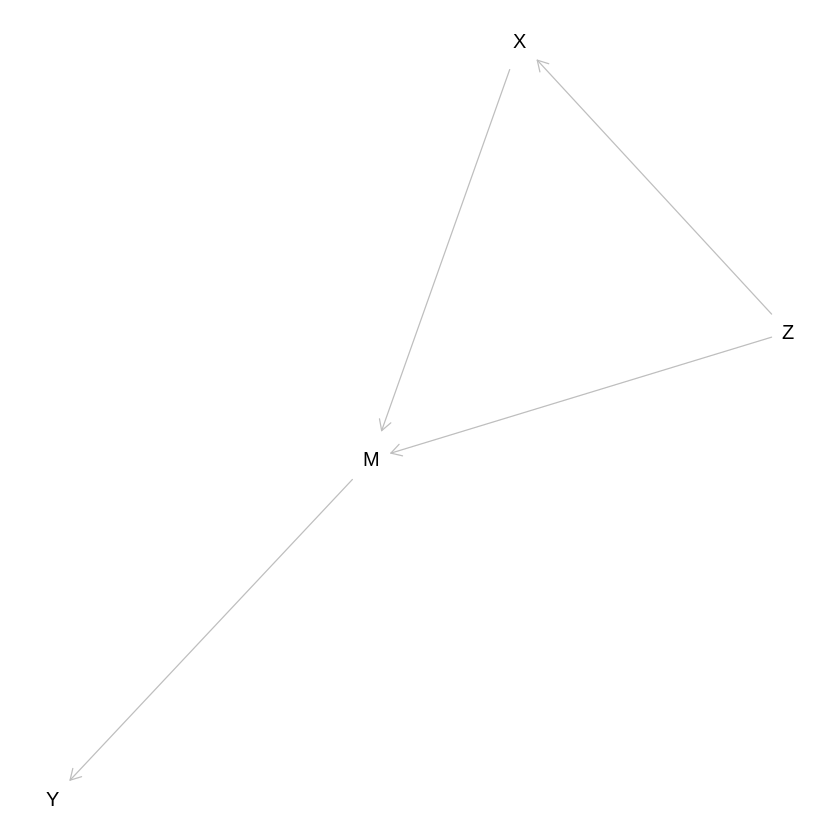

In [ ]:
# Creathe DAG for model 4
dag <- dagitty("dag {
  Z -> M
  Z -> X
  X -> M
  M -> Y
}")

# Visualizar el DAG
plot(dag)

In [ ]:
# Model 4: Generate variables
Z4 <- rnorm(n)
X4 <- 2 * Z4 + rnorm(n)
M4 <- 4 * Z4 + X4 + rnorm(n)
Y4 <- M4 + rnorm(n)

# Create data frame for Model 4
data4 <- data.frame(Z = Z4, X = X4, Y = Y4)

# Perform regression without Z
model4_without_Z <- lm(Y ~ X, data = data4)
print("\nModel 4 without Z:")
summary(model4_without_Z)

# Perform regression with Z
model4_with_Z <- lm(Y ~ X + Z, data = data4)
print("\nModel 4 with Z:")
summary(model4_with_Z)


[1] "\nModel 4 without Z:"



Call:
lm(formula = Y ~ X, data = data4)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9129 -1.5427 -0.0026  1.5353  8.5194 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.025175   0.019373  -1.299    0.194    
X            2.598490   0.008683 299.262   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.285 on 13911 degrees of freedom
Multiple R-squared:  0.8656,	Adjusted R-squared:  0.8655 
F-statistic: 8.956e+04 on 1 and 13911 DF,  p-value: < 2.2e-16


[1] "\nModel 4 with Z:"



Call:
lm(formula = Y ~ X + Z, data = data4)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6059 -0.9655  0.0029  0.9531  5.6912 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.003787   0.012078  -0.314    0.754    
X            0.993346   0.012125  81.924   <2e-16 ***
Z            4.008068   0.027092 147.940   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.425 on 13910 degrees of freedom
Multiple R-squared:  0.9478,	Adjusted R-squared:  0.9477 
F-statistic: 1.262e+05 on 2 and 13910 DF,  p-value: < 2.2e-16


### Model 7 - Bad Control: Inducing M-bias by controlling a collider

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



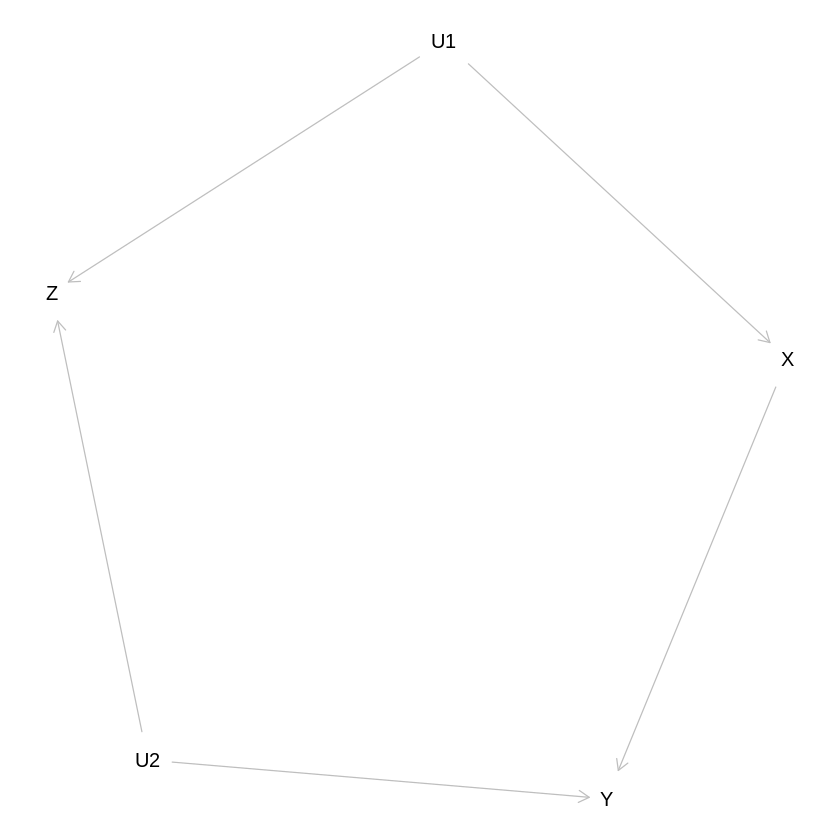

In [ ]:
# Creathe DAG for model 7
dag <- dagitty("dag {
  U1 -> X
  U1 -> Z
  X -> Y
  U2 -> Y
  U2 -> Z
}")

# Visualizar el DAG
plot(dag)

In [ ]:
# Model 7: Generate variables
U1 <- rnorm(n,0,1)
U2 <- rnorm(n,0,1)
Z7 <- 0.5*U1 + 0.8*U2 + rnorm(n,0,1)
X7 <- 3*U1 + rnorm(n,0,1)
Y7 <- 5*X7 + U2 + rnorm(n,0,1)

# Create data frame for Model 7
data7 <- data.frame(Z = Z7, X = X7, Y = Y7)

# Perform regression without Z
model7_without_Z <- lm(Y ~ X, data = data7)
print("\nModel 7 without Z:")
summary(model7_without_Z)

# Perform regression with Z
model7_with_Z <- lm(Y ~ X + Z, data = data7)
print("\nModel 7 with Z:")
summary(model7_with_Z)

[1] "\nModel 7 without Z:"



Call:
lm(formula = Y ~ X, data = data7)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4225 -0.9538 -0.0045  0.9431  5.3611 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.023265   0.011974   -1.943   0.0521 .  
X            5.000897   0.003789 1319.689   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.412 on 13911 degrees of freedom
Multiple R-squared:  0.9921,	Adjusted R-squared:  0.9921 
F-statistic: 1.742e+06 on 1 and 13911 DF,  p-value: < 2.2e-16


[1] "\nModel 7 with Z:"



Call:
lm(formula = Y ~ X + Z, data = data7)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9107 -0.8661  0.0054  0.8722  4.7751 

Coefficients:
             Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0.018248   0.010752   -1.697   0.0897 .  
X            4.928508   0.003626 1359.367   <2e-16 ***
Z            0.482224   0.008339   57.826   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.268 on 13910 degrees of freedom
Multiple R-squared:  0.9936,	Adjusted R-squared:  0.9936 
F-statistic: 1.082e+06 on 2 and 13910 DF,  p-value: < 2.2e-16


### Model 11 - Bad Control: Overcontrol bias by controlling a mediator

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



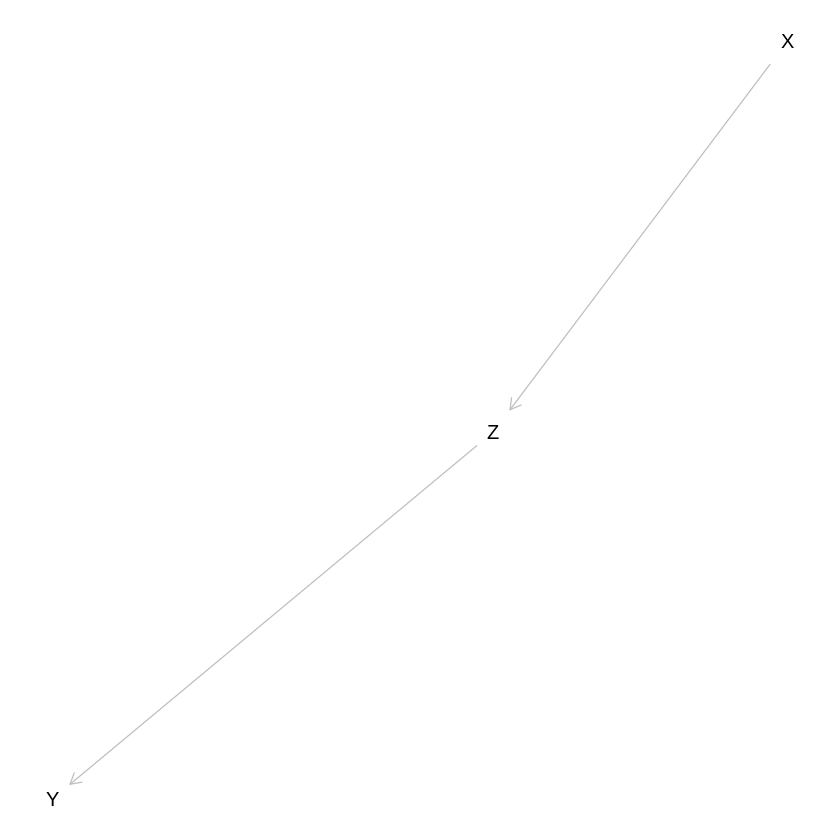

In [ ]:
# Creathe DAG for model 11
dag <- dagitty("dag {
  X -> Z
  Z -> Y
}")

# Visualizar el DAG
plot(dag)

In [ ]:
# Model 11: Generate variables
X11 <- rnorm(n,0,1)
Z11 <- 4 * X11 + rnorm(n,0,1)
Y11 <- Z11 + rnorm(n,0,1)

# Create data frame for Model 11
data11 <- data.frame(Z = Z11, X = X11, Y = Y11)

# Perform regression without Z
model11_without_Z <- lm(Y ~ X, data = data11)
print("\nModel 11 without Z:")
summary(model11_without_Z)

# Perform regression with Z
model11_with_Z <- lm(Y ~ X + Z, data = data11)
print("\nModel 11 with Z:")
summary(model11_with_Z)


[1] "\nModel 11 without Z:"



Call:
lm(formula = Y ~ X, data = data11)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3239 -0.9337  0.0071  0.9451  6.1206 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01042    0.01181   0.882    0.378    
X            3.98767    0.01186 336.141   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.392 on 13911 degrees of freedom
Multiple R-squared:  0.8904,	Adjusted R-squared:  0.8904 
F-statistic: 1.13e+05 on 1 and 13911 DF,  p-value: < 2.2e-16


[1] "\nModel 11 with Z:"



Call:
lm(formula = Y ~ X + Z, data = data11)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0241 -0.6743 -0.0062  0.6763  3.9247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.007616   0.008411   0.906   0.3652    
X           0.082092   0.034667   2.368   0.0179 *  
Z           0.980636   0.008442 116.164   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9921 on 13910 degrees of freedom
Multiple R-squared:  0.9444,	Adjusted R-squared:  0.9444 
F-statistic: 1.18e+05 on 2 and 13910 DF,  p-value: < 2.2e-16


### Model 14 - Neural Control

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.



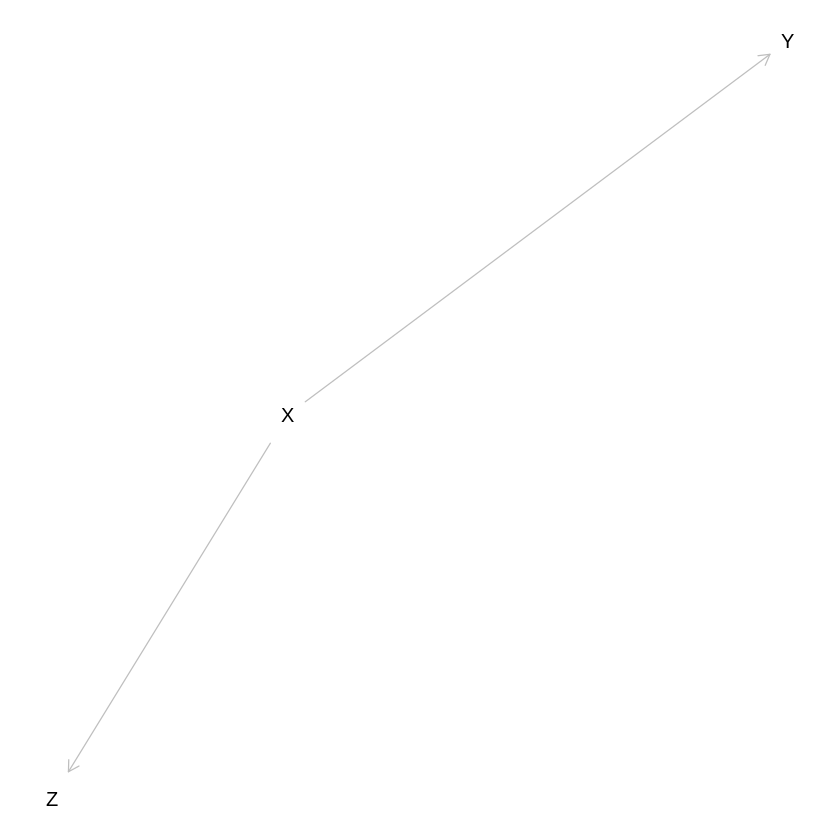

In [ ]:
# Creathe DAG for model14
dag <- dagitty("dag {
  X -> Y
  X -> Z

}")

plot(dag)

In [ ]:
# Model 14: Generate variables
X14 <- rnorm(n,0,1)
Z14 <- 3 * X14 + rnorm(n,0,1)
Y14 <- 8 * X14 + rnorm(n,0,1)

# Create data frame for Model 14
data14 <- data.frame(Z = Z14, X = X14, Y = Y14)

# Perform regression without Z
model14_without_Z <- lm(Y ~ X, data = data14)
print("\nModel 14 without Z:")
summary(model14_without_Z)

# Perform regression with Z
model14_with_Z <- lm(Y ~ X + Z, data = data14)
print("\nModel 14 with Z:")
summary(model14_with_Z)


[1] "\nModel 14 without Z:"



Call:
lm(formula = Y ~ X, data = data14)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9014 -0.6767 -0.0029  0.6851  3.7443 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.010811   0.008503   1.272    0.204    
X           8.008211   0.008526 939.297   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.003 on 13911 degrees of freedom
Multiple R-squared:  0.9845,	Adjusted R-squared:  0.9845 
F-statistic: 8.823e+05 on 1 and 13911 DF,  p-value: < 2.2e-16


[1] "\nModel 14 with Z:"



Call:
lm(formula = Y ~ X + Z, data = data14)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9001 -0.6773 -0.0031  0.6839  3.7464 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.010762   0.008504   1.265    0.206    
X            8.017712   0.026978 297.196   <2e-16 ***
Z           -0.003162   0.008519  -0.371    0.710    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.003 on 13910 degrees of freedom
Multiple R-squared:  0.9845,	Adjusted R-squared:  0.9845 
F-statistic: 4.411e+05 on 2 and 13910 DF,  p-value: < 2.2e-16


### Real-World Examples for Each Model
Here are examples for each model based on real data scenarios:

- **Model 1 (Good Control - Common Cause):** In health studies, controlling for socioeconomic status $Z$ while examining the impact of physical activity $X$ on health outcomes $Y$ can be beneficial, as socioeconomic status can be a common cause affecting both physical activity and health.

- **Model 4 (Good Control - Blocking Back-Door Paths through a Mediator):** In education, controlling for school resources $Z$ in a study of teaching quality $X$ and student performance $Y$ helps to block back-door paths through intermediaries, providing a more accurate estimate of the effect of teaching quality.

- **Model 7 (Bad Control - M-Bias):** In crime studies, controlling for neighborhood policing $Z$ in examining the relationship between social programs $X$ and crime rates $Y$ can induce bias through a previously unbiased path, because neighborhood policing could be a pre-treatment variable that opens back-door paths.

- **Model 11 (Bad Control - Overcontrol Bias):** In health, controlling for medication adherence $Z$ when evaluating the effect of a treatment $X$ on health outcomes $Y$ can lead to overcontrol bias, as medication adherence might be a mediator through which the treatment affects health outcomes.

- **Model 14 (Neutral Control - Possibly Helpful for Selection Bias):** In sociological studies, controlling for marital status $Z$ while assessing the impact of job training programs $X$ on employment rates $Y$ may not introduce bias and can sometimes be useful to manage selection bias in data collection.
